In [5]:
import json
import requests
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
# Free alpha vantage key: allows up to 25 requests per day
AV_API_KEY = 'VHV6A2A1YNQFVHO1'

In [7]:
sentiments = {}

In [8]:
# Read symbols file of ticker symbols 
with open('symbols.json', 'r') as f:
    tickers = json.load(f)

In [9]:
# cycle through each symbol, get sentiment, parse through results to get sentiment 
# label from that story for the desired symbol
# Jill: check r.status_code?
for ticker in tickers:
    url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&apikey={AV_API_KEY}"
    r = requests.get(url)
    data = r.json()
    sentiment_labels = []

    # Loop through each item in the feed
    for item in data['feed']:
        # Check if the ticker_sentiment list is present
        if 'ticker_sentiment' in item:
            # Loop through the ticker_sentiment list
            for ticker_sentiment in item['ticker_sentiment']:
                # Check if the ticker is "AAPL"
                if ticker_sentiment['ticker'] == ticker:
                    # Append the ticker sentiment label to the list
                    sentiment_labels.append(ticker_sentiment['ticker_sentiment_label'])
                
    #append the ticker and its list of related sentiments to teh sentiments dicionary
    sentiments[ticker] = sentiment_labels

   

In [10]:
# store dictionary of stock symbol + list of sentiments into a json file
with open('data/sentiments.json', 'w') as sf:
    json.dump(sentiments, sf)


In [11]:
# Next few lines are temporary code to generate pie charts

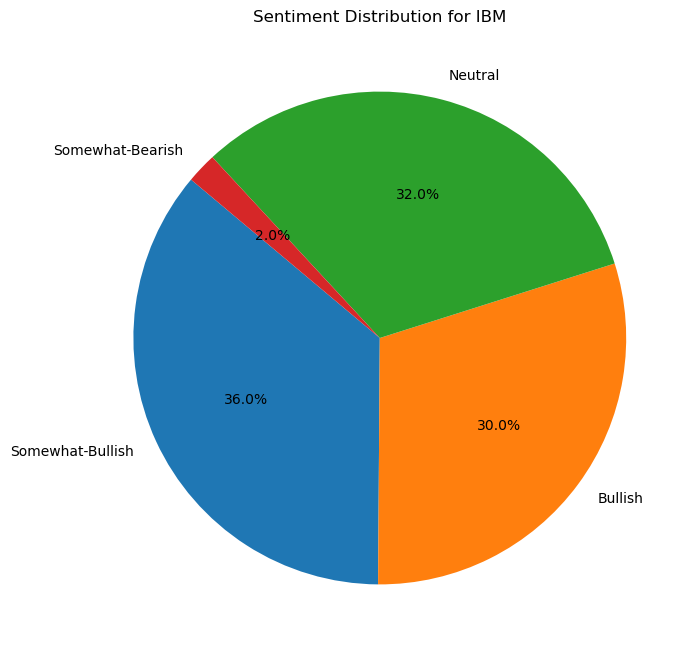

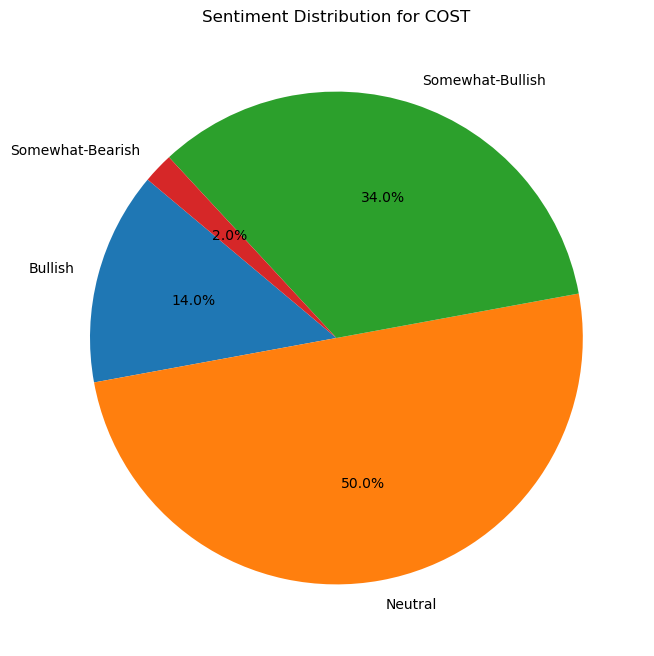

In [13]:
# temporary code to generate pie charts 
# Function to create a pie chart
#def create_pie_chart(symbol, sentiment_list):
#    sentiment_counts = Counter(sentiment_list)
#    labels = sentiment_counts.keys()
#    sizes = sentiment_counts.values()
#
#    plt.figure(figsize=(8, 8))
#    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
#    plt.title(f'Sentiment Distribution for {symbol}')
#    figname = "images/" + symbol + "_sensitivity.png"
#    plt.savefig(figname)
#    plt.show()



# Generate pie charts for each stock symbol
#for symbol, sentiment_list in sentiments.items():
#    create_pie_chart(symbol, sentiment_list)
